<a href="https://colab.research.google.com/github/SabirAjmal10/Hotel-Booking-Analysis-EDA-Capstone-Project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hotel Booking Analysis**




## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#**Data Pre-processing**

##**Importing libraries**

In [1]:
#Importing libraries

#importing pandas libraries with alias of pd
import pandas as pd

#importing numpy libraries with alias as np 
import numpy as np

#importing matplotlib library with alias as plt
import matplotlib.pyplot as plt

#importing seaborn library with alias of sns
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing datasets
df = pd.read_csv("//content/drive/MyDrive/Alma Better/Capstone Project - EDA/Hotel Bookings.csv")

In [4]:
#Analyzing the first five row of dataset.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Analyzing the last five row of dataset.
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
#Analyzing the shape of dataset
df.shape

(119390, 32)

In [9]:
#Analyzing numerical columns of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Collecting the information on quality and type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14590 entries, 0 to 14589
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14590 non-null  object 
 1   is_canceled                     14590 non-null  int64  
 2   lead_time                       14590 non-null  int64  
 3   arrival_date_year               14590 non-null  int64  
 4   arrival_date_month              14590 non-null  object 
 5   arrival_date_week_number        14590 non-null  int64  
 6   arrival_date_day_of_month       14590 non-null  int64  
 7   stays_in_weekend_nights         14590 non-null  int64  
 8   stays_in_week_nights            14590 non-null  object 
 9   adults                          14590 non-null  object 
 10  children                        14590 non-null  object 
 11  babies                          14590 non-null  object 
 12  meal                            

In [12]:
#Checking columns content of dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Checking  the contents in some of the  individual columns

In [10]:
#Checking various types hotels
print((df["hotel"].unique()))

['Resort Hotel' 'City Hotel']


In [11]:
#Checking 'is_canceled'columns
print(df["is_canceled"].unique())

[0 1]


Assuming 0-Not cancelled and 1-cancelled

In [13]:
#Checking 'arrival_date_year' column of dataset
print(df["arrival_date_year"].unique())

[2015 2016 2017]


In [14]:
#Checking the 'arrival_date_month' column of dataset
print(df["arrival_date_month"].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [15]:
#Checking the Nationality of customers in dataset
print(df["country"].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [16]:
#Checking the 'customer_type'column of dataset
print(df["customer_type"].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


##**Summary of data pre-processing**

*   Dataset have 119390 rows and 32 columns
*   Dataset have some object type datas
*   Dataset is of hotel bookings for the year 2015,2016 and 2017




#**Data Cleaning**

In [24]:
#checking the null value in the dataset
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

*   Dataset have huge no. of null values in company, agent, country and children columns


In [21]:
#filling the missing value of company and agent with 0
df[['company','agent']]= df[['company','agent']].fillna(0)

#filling the missing value of country with mode
df['country']= df['country'].fillna(df.country.mode().to_string())

#filling the  missing value of childern value by replacing round value of mean
df['children']= df['children'].fillna(round(df.children.mean()))



In [25]:
#Converting data column from float to int64
df['children'] = df['children'].astype('int64')

df['company'] = df['company'].astype('int64')

df['agent'] = df['agent'].astype('int64')

In [26]:
#Checking duplicate rows in the dataset
df.duplicated().sum()

0

In [27]:
#Droping duplicate rows in the dataset
df.drop_duplicates(inplace = True)

In [28]:
#Rechecking is there still any null values on the dataset
df.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"})

,column_name,null_values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


#**Exploratory Data Analysis**

#Hotel types visualization#

Text(0.5, 1.0, 'Hotel Types')

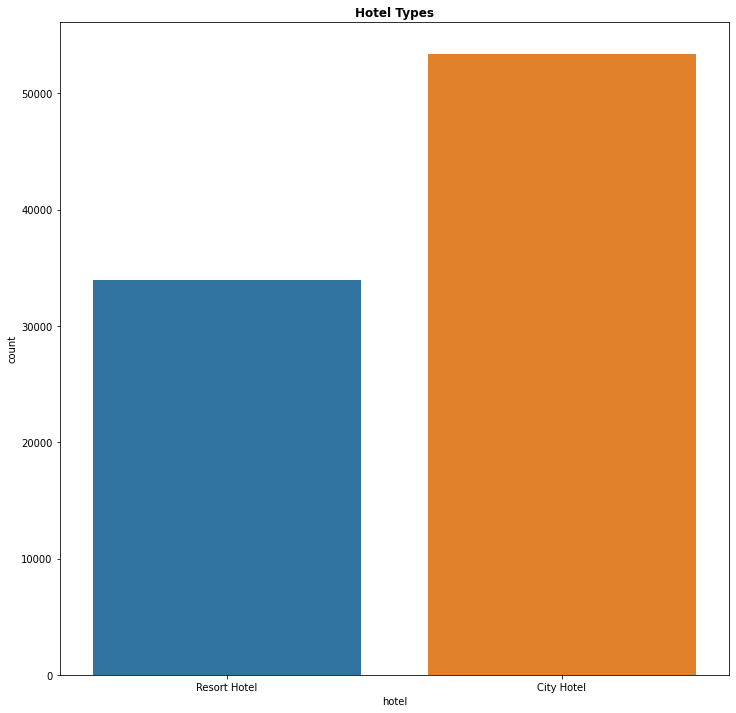

In [41]:
# Hotel Types Visualization with seaborn counterplot
plt.figure(figsize=(12,12))
sns.countplot(x = 'hotel', data = df)
plt.title('Hotel Types', weight = 'bold')

**Observation:**

- City hotels are more in number than resort hotels.


#Which type of hotel are most guests prefered#

In [23]:
#Creating table 
df["hotel"].value_counts().reset_index().rename(columns = {"index" : "Hotel Type", "hotel" : "No. of Hotel"})

,Hotel Type,No. of Hotel
0,City Hotel,53428
1,Resort Hotel,33968


([<matplotlib.patches.Wedge at 0x7fe8295e6fd0>,
 [Text(-1.1273456784142095, -0.4112076377705141, 'City Hotel'),
  Text(1.033400240504722, 0.37694023786905956, 'Resort Hotel')],
 [Text(-0.6576183124082887, -0.23987112203279987, '61.13%'),
  Text(0.563672858457121, 0.2056037661103961, '38.87%')])

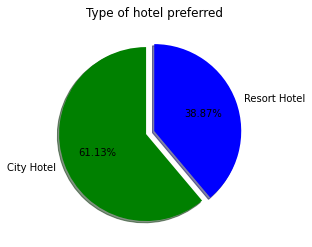

In [36]:
# Plotting the pie graph 
labels=list(df["hotel"].value_counts().index)
sizes=list(df["hotel"].value_counts())
colors=["green","blue"]
plt.title("Type of hotel preferred")
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")

**Observation:**

- The City hotel has more bookings than Resort hotel.
- Most guests are preferred city hotel than resort hotel


#Hotel cancellation#

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hotel in Cancel Situation')

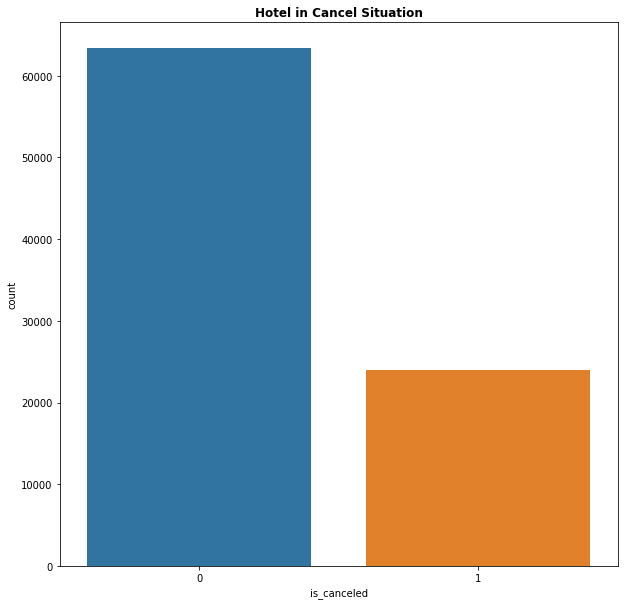

In [42]:
#Hotel cancellation in situation graph
x = df.is_canceled
y = df
plt.figure(figsize=(10,10))
sns.countplot(x,data = y)
plt.title('Hotel in Cancel Situation', weight='bold')
